# SVR Intution 

![image](svr.png)

# Import libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import dataframe

In [8]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [17]:
#Defining the independant and dependant variables
X = df.iloc[:,1:-1].values
X #Defining the independant variables

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [29]:
y= df.iloc[:,-1:].values #Defining the depedant variable
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

We need y here to be a 2D array as the transform function accepts only a 2D array .

# Feature Scaling

Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are **using distances between data points to determine their similarity.** <br>
For example, let’s say we have data containing high school CGPA scores of students (ranging from 0 to 5) and their future incomes (in thousands Rupees):
![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/knn_ex.png)
Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.
Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features.

## What is Normalization?
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.
![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Norm_eq.gif)

## What is Standardization?
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Stand_eq.gif)

## The Big Question – Normalize or Standardize?
Normalization vs. standardization is an eternal question among machine learning newcomers. 
1. Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

2. Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_std = sc_X.fit_transform(X)
X_std

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [47]:
sc_y = StandardScaler()
y_std = sc_y.fit_transform(y)
y_std

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Training the SVR model on the dataset

In [48]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_std,y_std)

D:\Anaconda\envs\ee4211\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

# Predict a new result

In [50]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

# Visualise the results

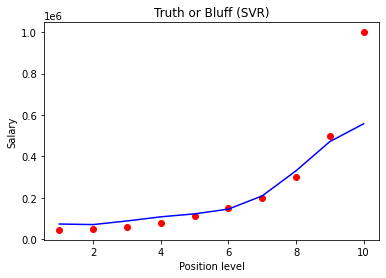

In [54]:
plt.scatter(sc_X.inverse_transform(X_std), sc_y.inverse_transform(y_std), color = 'red')
plt.plot(sc_X.inverse_transform(X_std), sc_y.inverse_transform(regressor.predict(X_std)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()